# Data Pipeline 

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [81]:
#Attribute Information:

#Class Values:

#unacc, acc, good, vgood

#Attributes:

#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#lug_boot: small, med, big.
#safety: low, med, high.

# Goal
Build an end-to-end machine learning "pipeline", that performs everything you need to achieve the prediction goal, from the raw data, to predicted results

### OPTIONAL 
Pipline: Luigi, Airflow

Take raw data to forcasted numbers

In [82]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [83]:
df = pd.read_csv('car_data.csv', header = None)

In [84]:
# Rename Columns

columns1 = ['Buying','Maintainence','Doors','Persons','Lug Boot','Safety','Class']
df.columns = columns1
df.head(5)

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [85]:
df.dtypes

Buying          object
Maintainence    object
Doors           object
Persons         object
Lug Boot        object
Safety          object
Class           object
dtype: object

In [86]:
df.isnull().sum()

Buying          0
Maintainence    0
Doors           0
Persons         0
Lug Boot        0
Safety          0
Class           0
dtype: int64

## Preprocessing Data

In [87]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['Buying'] = encode.fit_transform(df['Buying'])
df['Maintainence'] = encode.fit_transform(df['Maintainence'])
df['Doors'] = encode.fit_transform(df['Doors'])
df['Persons'] = encode.fit_transform(df['Persons'])
df['Lug Boot'] = encode.fit_transform(df['Lug Boot'])
df['Safety'] = encode.fit_transform(df['Safety'])
df['Class'] = encode.fit_transform(df['Class'])


In [98]:
y = df['Class']

In [88]:
df.head()

,Buying,Maintainence,Doors,Persons,Lug Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Explore the Data

In [89]:
import seaborn as sns

sns.set(style="whitegrid")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


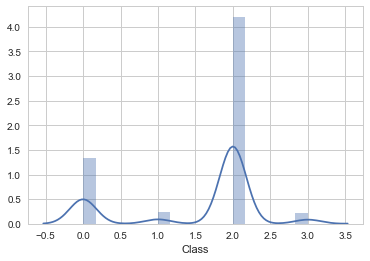

In [90]:
sns.distplot(df['Class'])

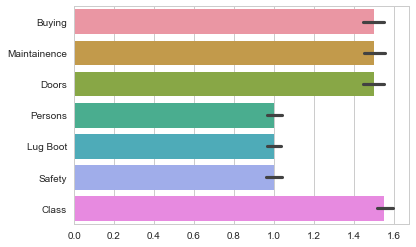

In [91]:
sns.barplot(data=df, orient="h")

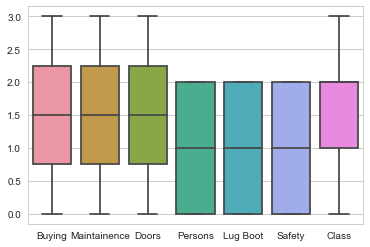

In [92]:
sns.boxplot(data=df)

## Split into train and test data

In [100]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = 0.3, random_state = 10)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1209, 7)
(519, 7)
(1209,)
(519,)


## Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
y_pred = lr.predict(X_test)

In [106]:
for i in zip(y_pred, y_test):
    print(i)

(2.0, 2)
(1.9999999999999991, 2)
(2.0000000000000004, 2)
(2.0, 2)
(0.9999999999999993, 1)
(2.0000000000000004, 2)
(-7.177253771738069e-16, 0)
(-4.959829607132069e-16, 0)
(2.000000000000001, 2)
(-3.8390932024521296e-16, 0)
(2.0000000000000004, 2)
(2.0, 2)
(2.0000000000000004, 2)
(2.0, 2)
(-8.028160920436238e-16, 0)
(-5.006466740116591e-16, 0)
(1.9999999999999996, 2)
(1.9999999999999991, 2)
(2.0, 2)
(2.0000000000000004, 2)
(1.9999999999999996, 2)
(1.9999999999999996, 2)
(2.000000000000001, 2)
(2.0, 2)
(2.0, 2)
(2.0, 2)
(2.0000000000000004, 2)
(-9.51783653128776e-16, 0)
(1.9999999999999991, 2)
(1.9999999999999991, 2)
(2.0, 2)
(2.0, 2)
(1.9999999999999991, 2)
(-1.4050825111252518e-15, 0)
(1.9999999999999996, 2)
(1.9999999999999991, 2)
(1.9999999999999996, 2)
(2.0, 2)
(2.0, 2)
(5.384534164520406e-17, 0)
(1.9999999999999996, 2)
(1.9999999999999996, 2)
(1.9999999999999991, 2)
(3.000000000000001, 3)
(2.0, 2)
(-7.210484706467802e-16, 0)
(2.000000000000001, 2)
(2.0000000000000004, 2)
(1.99999999

In [107]:
print(lr.coef_)
print(lr.intercept_)

[-2.83635716e-17  1.59554482e-16 -7.53008712e-17  6.02266419e-16
 -1.44535569e-17 -2.54594449e-16  1.00000000e+00]
-1.3322676295501878e-15


### Evaluating  results

In [108]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))

5.467233004240059e-16
1.0


## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
y_pred = logit.predict(X_test)

In [111]:
list(zip(y_pred, y_test))

[(2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (3, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 1),
 (2, 3),
 (2, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (0, 0),
 (2, 3),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 

In [113]:
print(logit.coef_)
print(logit.intercept_)

[[ 2.29519238e-01  2.59583166e-01  1.09949423e-01  6.43767126e-01
   1.71349608e-01 -4.82381077e-03 -5.88624331e+00]
 [-1.48317961e-01 -2.04816622e-01  5.33689904e-02  5.53601725e-01
  -1.43515900e-01  2.73472468e-01 -4.93041427e-01]
 [ 1.23563933e-01  2.10626330e-01 -2.61188844e-01 -1.39976478e+00
   7.24741444e-01  1.04361510e+00  2.78132016e+00]
 [-5.89944004e-01 -5.54563522e-01 -1.02167440e-01  1.02282456e+00
  -1.25892474e+00 -3.21850778e+00  2.29937849e+00]]
[ 1.77862411 -2.91828916 -3.21833853 -5.23003989]


### Evaluating results

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

metrics.accuracy_score(y_test, y_pred)

0.9132947976878613

In [115]:
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print(metrics.f1_score(y_test, y_pred, average='weighted'))

0.86474392235801
0.9132947976878613
0.8796624586772864


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       102
          1       0.00      0.00      0.00        21
          2       0.90      0.99      0.95       371
          3       0.60      0.12      0.20        25

avg / total       0.86      0.91      0.88       519



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
confusex = confusion_matrix(y_test, y_pred)

In [118]:
confusex

array([[102,   0,   0,   0],
       [  3,   0,  18,   0],
       [  0,   0, 369,   2],
       [  0,   0,  22,   3]])

In [119]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

,0,1,2,3
0,102,0,0,0
1,3,0,18,0
2,0,0,369,2
3,0,0,22,3


## Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
y_pred = tree.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

1.0

In [123]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       102
          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00       371
          3       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00       519

